In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#import data
from sklearn.datasets import load_breast_cancer
cancer_dataset = load_breast_cancer()
print("Data imported")

Data imported


In [3]:
#cancer.head() gives arror as it's not a df yet
cancer_dataset.keys()#it is dict

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [4]:
cancer_dataset['DESCR']

'.. _breast_cancer_dataset:\n\nBreast cancer wisconsin (diagnostic) dataset\n--------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 569\n\n    :Number of Attributes: 30 numeric, predictive attributes and the class\n\n    :Attribute Information:\n        - radius (mean of distances from center to points on the perimeter)\n        - texture (standard deviation of gray-scale values)\n        - perimeter\n        - area\n        - smoothness (local variation in radius lengths)\n        - compactness (perimeter^2 / area - 1.0)\n        - concavity (severity of concave portions of the contour)\n        - concave points (number of concave portions of the contour)\n        - symmetry \n        - fractal dimension ("coastline approximation" - 1)\n\n        The mean, standard error, and "worst" or largest (mean of the three\n        largest values) of these features were computed for each image,\n        resulting in 30 features.  For instance,

In [5]:
cancer = pd.DataFrame(data =cancer_dataset['data'], columns= cancer_dataset['feature_names'])

In [6]:
cancer.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


before applying PCA, apply scaling
use ** MinMaxScaler** or **StandardScaler**

1. **MinMaxScaler**

    Transform data into 0 to 1 range

In [7]:
from sklearn.preprocessing import MinMaxScaler

In [8]:
minmaxscaler = MinMaxScaler()
minmaxscaler.fit(cancer)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [9]:
mnmx_cancer = minmaxscaler.transform(cancer)

In [10]:
mnmx_cancer

array([[0.52103744, 0.0226581 , 0.54598853, ..., 0.91202749, 0.59846245,
        0.41886396],
       [0.64314449, 0.27257355, 0.61578329, ..., 0.63917526, 0.23358959,
        0.22287813],
       [0.60149557, 0.3902604 , 0.59574321, ..., 0.83505155, 0.40370589,
        0.21343303],
       ...,
       [0.45525108, 0.62123774, 0.44578813, ..., 0.48728522, 0.12872068,
        0.1519087 ],
       [0.64456434, 0.66351031, 0.66553797, ..., 0.91065292, 0.49714173,
        0.45231536],
       [0.03686876, 0.50152181, 0.02853984, ..., 0.        , 0.25744136,
        0.10068215]])

2. **Standard Scaler**

    Transforms data -2 to +2

In [11]:
from sklearn.preprocessing import StandardScaler
standardscaler = StandardScaler()

In [12]:
standardscaler.fit(cancer)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [13]:
scaled_cancer = standardscaler.transform(cancer)

In [14]:
scaled_cancer

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [15]:
from sklearn.decomposition import PCA

In [16]:
pca = PCA(n_components=2)
#n_components = no.of required dimensions

#### Applying PCA on MinMaxScaled data

In [17]:
pca.fit(mnmx_cancer)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [18]:
mnmx_pca = pca.transform(mnmx_cancer)

## Draw a Scree plot and a PCA plot

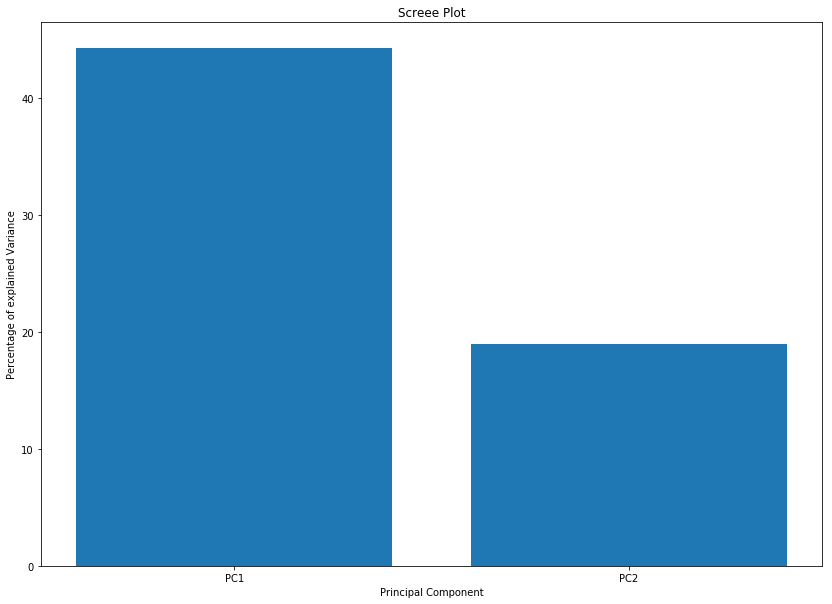

In [28]:
#The following code constructs the Scree plot

percentage_variation = np.round(pca.explained_variance_ratio_* 100, decimals =1)
#calculates the % of variation that each principal component accounts for.

labels = ['PC' + str(x) for x in range(1,len(percentage_variation)+1)]
#creating labels for the scree plot. 

#creating a bar plot from Matplotlib 
plt.figure(figsize = (14,10))
plt.bar(x = range(1,len(percentage_variation)+1), height = percentage_variation, tick_label = labels)
plt.ylabel('Percentage of explained Variance')
plt.xlabel('Principal Component')
plt.title('Screee Plot')
plt.show()

### PCA plot

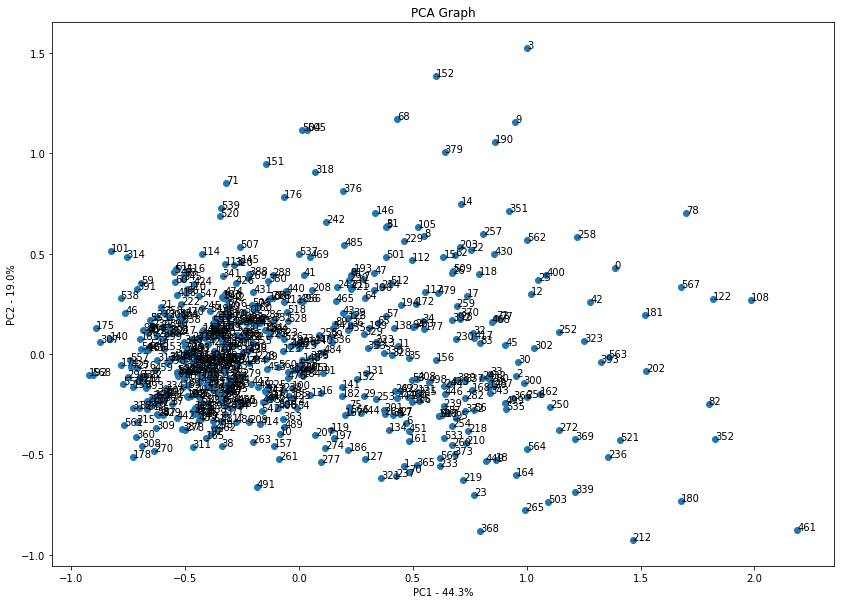

In [31]:
pca_df = pd.DataFrame(mnmx_pca,columns=labels)
#put the new coordinates created by pca.transform(scaled_data) 
#into a matrix where the rows have sample labels and 
#columns have PC labels

plt.figure(figsize = (14,10))
plt.scatter(pca_df.PC1, pca_df.PC2)
plt.title('PCA Graph')
plt.xlabel('PC1 - {0}%'.format(percentage_variation[0]))
plt.ylabel('PC2 - {0}%'.format(percentage_variation[1]))

#this loop adds sample names to the graph
for sample in pca_df.index:
    plt.annotate(sample, (pca_df.PC1.loc[sample], pca_df.PC2.loc[sample]))
plt.show()

### Loading Scores

Loading scores for PC1 to determine which genes had the largest influence on separating the two clusters along the x-axis

In [32]:
loading_scores = pd.Series(pca.components_[0]) 
#loading scores in PC1, PC1 = 0

sorted_loading_scores = loading_scores.abs().sort_values(ascending = False)
# sort loading scores by abs value(magnitude)

top_10_index = sorted_loading_scores[0:10].index.values

print(loading_scores[top_10_index])
#printing top 10 genes and their resp loading scores

7     0.260854
6     0.258400
27    0.250886
5     0.239285
22    0.236640
26    0.228768
20    0.227997
2     0.227537
23    0.224871
3     0.220995
dtype: float64


In [20]:
mnmx_cancer.shape

(569, 30)

In [30]:
mnmx_pca

array([[ 1.38702121,  0.42689533],
       [ 0.46230825, -0.55694674],
       [ 0.95462147, -0.10970115],
       ...,
       [ 0.22631131, -0.28794577],
       [ 1.67783369,  0.33594595],
       [-0.90506804, -0.10410875]])

In [21]:
mnmx_pca.shape

(569, 2)

Text(0,0.5,'Second principle component')

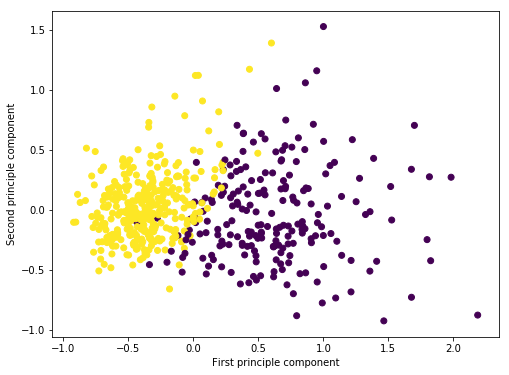

In [22]:
plt.figure(figsize=(8,6))
plt.scatter(mnmx_pca[:,0],mnmx_pca[:,1] ,c=cancer_dataset['target'])
plt.xlabel('First principle component')
plt.ylabel('Second principle component')

#### Appylying PCA on StandardScaler 

In [23]:
pca.fit(scaled_cancer)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [24]:
scaled_pca = pca.transform(scaled_cancer)

In [25]:
scaled_pca.shape

(569, 2)

In [26]:
scaled_pca

array([[ 9.19283683,  1.94858307],
       [ 2.3878018 , -3.76817174],
       [ 5.73389628, -1.0751738 ],
       ...,
       [ 1.25617928, -1.90229671],
       [10.37479406,  1.67201011],
       [-5.4752433 , -0.67063679]])

Text(0,0.5,'Second principle component')

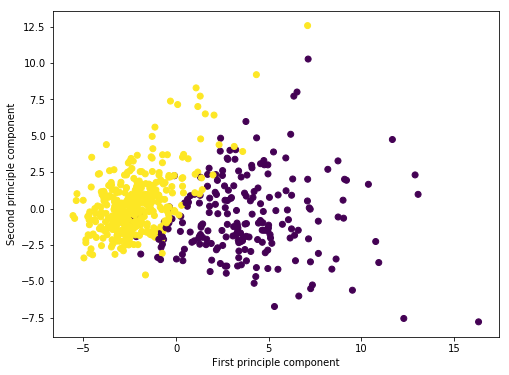

In [27]:
plt.figure(figsize=(8,6))
plt.scatter(scaled_pca[:,0],scaled_pca[:,1],c=cancer_dataset['target'])
plt.xlabel('First principle component')
plt.ylabel('Second principle component')